# KLASIFIKASI UNTUK PREDIKSI DIAGNOSIS FERTILITY

Fertilitas atau kesuburan adalah kemampuan organisme untuk mereproduksi dan menghasilkan keturunan yang sehat. Pada manusia, fertilitas mengacu pada kapasitas pria dan wanita untuk berkontribusi dalam proses pembuahan yang menghasilkan kehamilan dan kelahiran anak yang sehat. Kesuburan merupakan hasil dari berbagai faktor yang kompleks, termasuk kesehatan reproduksi, gaya hidup, dan faktor genetik.

Infertilitas, sebaliknya, adalah ketidakmampuan pasangan untuk hamil setelah satu tahun berhubungan seksual secara teratur tanpa menggunakan kontrasepsi. Ini dapat disebabkan oleh berbagai faktor yang mempengaruhi baik pria maupun wanita. Dalam beberapa kasus, penyebabnya bisa tidak diketahui, yang disebut dengan infertilitas idiopatik.

## TUJUAN

Tujuan dari analisis dataset ini adalah untuk mengeksplorasi dan memahami faktor-faktor yang mempengaruhi fertilitas pria, dengan menganalisis data ini, kita bisa mengetahui variabel-variabel mana yang memiliki pengaruh signifikan terhadap fertilitas.

Membangun model prediksi, menggunakan data ini untuk melatih model machine learning yang dapat memprediksi diagnosis fertilitas (normal atau altered) berdasarkan fitur-fitur yang ada. 

Memberikan wawasan untuk intervensi medis atau perubahan gaya hidup, berdasarkan analisis, kita dapat memberikan rekomendasi yang dapat membantu meningkatkan fertilitas, seperti perubahan dalam gaya hidup atau perawatan medis tertentu. 

Mengidentifikasi pola dan tren dalam data, melihat bagaimana berbagai faktor interaksi satu sama lain dan bagaimana mereka secara kolektif mempengaruhi hasil fertilitas.


Analisis ini tidak hanya bermanfaat untuk memahami lebih lanjut tentang fertilitas pria, tetapi juga dapat digunakan oleh profesional medis untuk meningkatkan strategi perawatan dan memberikan rekomendasi yang lebih baik kepada pasien.


# DATA UNDERSTANDING

Data Understanding atau memahami data adalah sebuah tahapan di dalam metodologi sains data dan pengembangan AI yang bertujuan untuk mendapatkan pemahaman awal mengenai data yang dibutuhkan untuk memecahkan permasalahan yang diberikan. Pada analisis ini kita akan memahami Dataset Fertility

## MENGUMPULKAN DATA

Data yang digunakan di analisis ini adalah Dataset Fertility yang didapat di https://archive.ics.uci.edu/dataset/244/fertility

Setelah kita mendapatkan data yang sesuai, selanjutnya kita upload data tersebut ke database atau drive yang kita miliki. Kemudian kami integrasikan dataset tersebut ke notebooks yang digunakan.

In [1]:
df_1 = _deepnote_execute_sql('SELECT * FROM fertility.fertility', 'SQL_0A99A490_95B5_4FD7_86DC_469537FD258A', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_1

,id,season,age,child_diseases,accident,surgical_intervention,high_fevers,alcohol,smoking,hrs_sitting,diagnosis
0,1,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,2,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,3,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,4,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,5,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
...,...,...,...,...,...,...,...,...,...,...,...
95,96,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
96,97,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
97,98,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
98,99,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


Data diatas merupakan data yang akan digunakan selama analisis kali ini.

Dikarenakan Mysql harus terdapat Primary Key, kami menambahkan kolom Id sebagai Primary Key dan di set Auto Incremenet.

## MEMAHAMI DATA

Dataset fertility yang digunakan untuk analisis disini adalah dataset fertility  yang didapat dari UCI Machine Learning Repository (https://archive.ics.uci.edu/dataset/244/fertility), berisi informasi mengenai fertilitas pria.

Pada Dataset Fertility ini terdapat 100 Data, dengan 9 Fitur dan 1 Target.

Data ini dikumpulkan dari 100 relawan yang memberikan sampel air mani yang dianalisis sesuai kriteria WHO 2010. Konsentrasi sperma berkaitan dengan data sosio-demografis, faktor lingkungan, status kesehatan, dan kebiasaan hidup. 

Setiap entri dalam dataset ini mencakup berbagai parameter yang dapat mempengaruhi fertilitas pria, seperti 

- Musim saat analisis dilakukan

- Usia

- Penyakit masa kecil

- Kecelakaan atau trauma serius 

- Intervensi bedah

- Demam tinggi dalam setahun terakhir

- Frekuensi konsumsi alkohol

- Kebiasaan merokok

- Jumlah jam duduk per hari.

Fitur-fitur ini diukur dan dikodekan menggunakan skala numerik atau kategorikal untuk memungkinkan analisis statistik dan prediktif.

Fitur-fitur dalam dataset ini dipilih berdasarkan relevansinya terhadap kesehatan reproduksi pria. Misalnya, demam tinggi dapat mempengaruhi spermatogenesis, sementara kebiasaan merokok dan konsumsi alkohol diketahui berdampak negatif pada kualitas sperma. Selain itu, faktor gaya hidup seperti jumlah jam duduk per hari dapat mencerminkan aktivitas fisik seseorang, yang juga dapat mempengaruhi kesehatan reproduksi.

Dengan menganalisis data ini, kita dapat mengidentifikasi pola dan hubungan antara berbagai faktor tersebut dan fertilitas pria, serta memberikan wawasan yang dapat digunakan untuk intervensi medis atau perubahan gaya hidup guna meningkatkan fertilitas. Analisis yang cermat terhadap dataset ini tidak hanya membantu dalam memahami kondisi fertilitas saat ini, tetapi juga dapat berkontribusi pada penelitian lebih lanjut di bidang kesehatan reproduksi.

## PENJELASAN FITUR

Setiap entri dalam dataset ini mencakup berbagai parameter yang dapat mempengaruhi fertilitas pria, seperti:

1. Season (Musim saat analisis dilakukan)
	Musim dapat mempengaruhi fertilitas melalui faktor-faktor seperti suhu lingkungan dan tingkat aktivitas fisik. Perubahan musim dapat mempengaruhi fertilitas melalui beberapa cara, seperti perubahan suhu lingkungan, panjang hari, dan aktivitas fisik yang mungkin bervariasi sepanjang tahun. Misalnya, suhu tinggi di musim panas dapat mempengaruhi produksi sperma, sedangkan musim dingin mungkin berhubungan dengan pola aktivitas yang berbeda.

- Kategori: Winter, Spring, Summer, Fall

- Nilai terkode: -1 (Winter), -0.33 (Spring), 0.33 (Summer), 1 (Fall)

- Tipe data: Numerik kontinu

2. Age (Usia saat analisis)
	Usia merupakan faktor penting dalam fertilitas. Pada pria, kualitas sperma cenderung menurun seiring bertambahnya usia, yang dapat mempengaruhi kemampuan untuk menghasilkan keturunan. Selain itu, usia juga bisa berpengaruh pada kesehatan umum dan produksi hormon yang berkaitan dengan reproduksi. Biasanya rentang usia 18-36 dianggap sebagai usia reproduktif pria.

- Rentang usia: 18-36 tahun

- Nilai terkode: 0 (rentang usia tidak dispesifikkan), 1 (rentang usia tidak dispesifikkan)

- Tipe data: Numerik kontinu

- Catatan: Biasanya rentang usia 18-36 dianggap sebagai usia reproduktif pria.

3. Child Diseases (Penyakit masa kecil)
	Penyakit tertentu pada masa kecil dapat mempengaruhi perkembangan sistem reproduksi. Penyakit seperti cacar air, campak, gondongan, dan polio yang dialami pada masa kecil dapat mempengaruhi perkembangan sistem reproduksi. Misalnya, gondongan yang terjadi setelah pubertas dapat menyebabkan orkitis, yang dapat mempengaruhi produksi sperma.

- Penyakit yang termasuk: Cacar air, campak, gondongan, polio

- Nilai terkode: 0 (ya, pernah menderita penyakit masa kecil), 1 (tidak, tidak pernah menderita penyakit masa kecil)

- Tipe data: Kategorikal biner

4. Accident (Kecelakaan atau trauma serius)
	Trauma fisik yang serius, terutama yang melibatkan area panggul atau organ reproduksi, dapat mempengaruhi fertilitas. Trauma juga bisa menyebabkan stres psikologis, yang dapat mempengaruhi keseimbangan hormonal dan fungsi reproduksi.

- Nilai terkode: 0 (ya, pernah mengalami kecelakaan atau trauma serius), 1 (tidak, tidak pernah mengalami kecelakaan atau trauma serius)

- Tipe data: Kategorikal biner

5. Surgical Intervention (Intervensi bedah)
	Operasi, khususnya yang melibatkan sistem reproduksi seperti vasektomi atau operasi hernia inguinalis, dapat mempengaruhi fertilitas. Operasi lainnya, yang menyebabkan stres fisik yang signifikan, juga dapat mempengaruhi kesehatan reproduksi.

- Nilai terkode: 0 (ya, pernah menjalani intervensi bedah), 1 (tidak, tidak pernah menjalani intervensi bedah)

- Tipe data: Kategorikal biner

6. High Fevers (Demam tinggi dalam setahun terakhir)
	Demam tinggi dapat mempengaruhi produksi sperma dan kualitasnya karena suhu tubuh yang meningkat dapat merusak spermatogenesis. Efek ini bisa sementara atau permanen tergantung pada durasi dan keparahan demam.

- Kategori: Kurang dari tiga bulan lalu, lebih dari tiga bulan lalu, tidak pernah

- Nilai terkode: -1 (kurang dari tiga bulan lalu), 0 (lebih dari tiga bulan lalu), 1 (tidak pernah)

- Tipe data: Kategorikal ordinal

7. Alcohol (Frekuensi konsumsi alkohol)
	Konsumsi alkohol berlebihan dapat mempengaruhi produksi hormon dan kualitas sperma. Alkohol juga dapat menyebabkan kerusakan hati, yang berperan dalam metabolisme hormon, dan mengganggu keseimbangan hormonal yang penting untuk fungsi reproduksi yang normal.

- Kategori: Beberapa kali sehari, setiap hari, beberapa kali seminggu, sekali seminggu, hampir tidak pernah atau tidak pernah

- Nilai terkode: 0, 1 (kategorisasi frekuensi tidak dijelaskan lebih lanjut)

- Tipe data: Kategorikal ordinal

8. Smoking (Kebiasaan merokok)
	Merokok diketahui memiliki efek negatif pada kualitas sperma, termasuk jumlah sperma, motilitas sperma (kemampuan bergerak), dan morfologi sperma (bentuk dan struktur). Bahan kimia dalam rokok dapat menyebabkan stres oksidatif dan kerusakan DNA pada sperma.

- Kategori: Tidak pernah, kadang-kadang, setiap hari

- Nilai terkode: -1 (tidak pernah), 0 (kadang-kadang), 1 (setiap hari)

- Tipe data: Kategorikal ordinal

9. Hrs Sitting (Jumlah jam duduk per hari)
	Merokok diketahui memiliki efek negatif pada kualitas sperma, termasuk jumlah sperma, motilitas sperma (kemampuan bergerak), dan morfologi sperma (bentuk dan struktur). Bahan kimia dalam rokok dapat menyebabkan stres oksidatif dan kerusakan DNA pada sperma.

- Rentang waktu: 0-16 jam

- Nilai terkode: 0, 1 (kategorisasi tidak dijelaskan lebih lanjut)

- Tipe data: Numerik kontinu

Diagnosis (Target)
	Dengan menganalisis data ini, kita dapat mengidentifikasi pola dan hubungan antara berbagai faktor tersebut dan fertilitas pria, serta memberikan wawasan yang dapat digunakan untuk intervensi medis atau perubahan gaya hidup guna meningkatkan fertilitas. Analisis yang cermat terhadap dataset ini tidak hanya membantu dalam memahami kondisi fertilitas saat ini, tetapi juga dapat berkontribusi pada penelitian lebih lanjut di bidang kesehatan reproduksi.

- Kategori: Normal (N), altered (O)

- Tipe data: Kategorikal nominal

## EKSPLORASI DATA

In [2]:
import pandas as pd

fertility = pd.DataFrame(df_1)
fertility[['season', 'age', 'child_diseases', 'accident', 'surgical_intervention', 'high_fevers', 'alcohol', 'smoking', 'hrs_sitting']].describe()

,season,age,child_diseases,accident,surgical_intervention,high_fevers,alcohol,smoking,hrs_sitting
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.078900,0.669000,0.870000,0.440000,0.510000,0.190000,0.832000,-0.350000,0.406800
std,0.796725,0.121319,0.337998,0.498888,0.502418,0.580752,0.167501,0.808728,0.186395
min,-1.000000,0.500000,0.000000,0.000000,0.000000,-1.000000,0.200000,-1.000000,0.060000
25%,-1.000000,0.560000,1.000000,0.000000,0.000000,0.000000,0.800000,-1.000000,0.250000
50%,-0.330000,0.670000,1.000000,0.000000,1.000000,0.000000,0.800000,-1.000000,0.380000
75%,1.000000,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Berikut adalah beberapa informasi yang dihasilkan oleh describe():

- Count (Jumlah): Jumlah entri non-null dalam setiap kolom.

- Mean (Rata-rata): Rata-rata dari setiap kolom.

- Std (Standar Deviasi): Standar deviasi dari setiap kolom, mengukur seberapa tersebar data di sekitar rata-rata.

- Min (Minimum): Nilai minimum dalam setiap kolom.

- 25% (Kuartil Pertama): Nilai kuartil pertama (25th percentile) dari setiap kolom, menandakan nilai di bawahnya 25% dari data.

- 50% (Median): Nilai median (50th percentile) dari setiap kolom, membagi data menjadi dua bagian yang sama.

- 75% (Kuartil Ketiga): Nilai kuartil ketiga (75th percentile) dari setiap kolom, menandakan nilai di bawahnya 75% dari data.

- Max (Maksimum): Nilai maksimum dalam setiap kolom Jumlah data setiap class/specie

# DATA PREPROCESSING

## MISSING VALUE

Missing value (Nilai yang hilang) merujuk kepada situasi di mana data untuk suatu variabel tidak tersedia atau tidak terisi dengan nilai yang valid. Ini bisa terjadi karena berbagai alasan, seperti kegagalan pengukuran, kesalahan input, atau hanya karena data tidak ada.

Kita akan mengecek untuk kualitas data, apakah data tersebut memiliki Missing Value atau tidak.

In [3]:
fertility.isnull().sum()

id                       0
season                   0
age                      0
child_diseases           0
accident                 0
surgical_intervention    0
high_fevers              0
alcohol                  0
smoking                  0
hrs_sitting              0
diagnosis                0
dtype: int64

Hasil dari pengecekan ini menunjukkan bahwa tidak ada Missing Value dalam Dataset tersebut. Setiap entri dalam Dataset lengkap dan mencakup semua atribut yang diperlukan. Ketiadaan Missing Value ini memungkinkan kita untuk melakukan analisis data secara langsung tanpa perlu langkah tambahan untuk menangani kekurangan data. Dengan demikian, hasil analisis akan lebih akurat.

## OUTLIER DATA

Outlier adalah nilai yang jauh berbeda dari nilai lainnya dalam kumpulan data. Nilai ini muncul sebagai pengecualian dalam pola data yang ada.

Nilai yang ada di outlier bisa jauh lebih tinggi maupun lebih rendah dibandingkan dengan nilai-nilai lain dalam dataset. Outlier bisa terjadi karena berbagai alasan, termasuk kesalahan pengukuran, kejadian langka, atau karena faktor lain yang tidak terduga.

### LOCAL OUTLIER FACTOR

Local Outlier Factor (LOF) adalah salah satu algoritma yang digunakan untuk mengidentifikasi outlier dalam dataset.

LOF bekerja dengan memperhitungkan kepadatan lingkungan dari setiap titik data. Konsep utamanya adalah bahwa titik yang dianggap sebagai outlier akan memiliki kepadatan lingkungan yang lebih rendah daripada tetangga-tetangganya. Dalam konteks LOF, ketika suatu titik dianggap sebagai outlier berdasarkan kepadatan lingkungan lokalnya, maka titik tersebut disebut sebagai local outlier.

Algoritma LOF mengevaluasi kepadatan setiap titik data relatif terhadap kepadatan titik-titik tetangga di sekitarnya. Dengan cara ini, LOF dapat mengidentifikasi outlier yang mungkin tersembunyi dalam berbagai tingkat kepadatan di seluruh kumpulan data. Ini membuat LOF efektif ketika kepadatan data tidak merata di seluruh dataset, karena mampu menyesuaikan dengan lingkungan lokal setiap titik data. untuk langkah langkahnya sebagai berikut :

1. Menghitung jarak dan menentukan tetangga.

<img src="_images/image-20240622-113322.png" width="" align="" />

2. Menghitung Reachability Distance (RD).

<img src="_images/image-20240622-114148.png" width="50%" align="" />

3. Menghitung Local Reachability Distance (LRD).

Hitung LRD untuk setiap data dengan menghitung kebalikan dari jarak rata-rata antara data dan tetangganya.

<img src="_images/image-20240622-114030.png" width="50%" align="" />

4. Menghitung Local Outlier Factor (LOF).

<img src="_images/image-20240622-114241.png" width="75%" align="" />

### IMPLEMENTASI PADA DATASET

In [4]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import precision_score
import mysql.connector
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Koneksi ke database MySQL
sql_connection = mysql.connector.connect(
    host='mysql-b1da7b1-surya22149.a.aivencloud.com',
    port=15391,
    user='avnadmin',
    password='AVNS_zBTOptR3g0qGi1CjCvE',
    database='fertility',
)

# Membaca data dari database menggunakan Pandas
query = "SELECT * FROM fertility"
data_df = pd.read_sql(query, sql_connection)

# Menutup koneksi ke database
sql_connection.close()

# Pisahkan kolom numerik dan non-numerik
numeric_cols = data_df.select_dtypes(include=[np.number]).columns
non_numeric_cols = data_df.select_dtypes(exclude=[np.number]).columns

# Menghapus kolom 'id' dari numeric_cols jika ada
numeric_cols = numeric_cols.drop('id', errors='ignore')

# Menangani missing values pada kolom numerik dengan mengisi nilai rata-rata
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data_numeric_imputed = pd.DataFrame(imputer.fit_transform(data_df[numeric_cols]), columns=numeric_cols)

# Gabungkan kembali kolom numerik yang sudah diimputasi dengan kolom non-numerik
data_imputed_df = pd.concat([data_numeric_imputed, data_df[non_numeric_cols]], axis=1)

# Membuat model LOF
lof = LocalOutlierFactor(n_neighbors=5, contamination=0.013)

# Melakukan prediksi outlier untuk setiap fitur numerik
outlier_indices = []
for column in numeric_cols:
    # Mengambil nilai fitur
    feature_values = data_imputed_df[column].values.reshape(-1, 1)
    # Melakukan prediksi outlier
    y_pred = lof.fit_predict(feature_values)
    # Menambahkan indeks outlier ke dalam daftar outlier_indices
    outlier_indices.extend([(i, column) for i, label in enumerate(y_pred) if label == -1])

# Menghilangkan indeks outlier yang duplikat
outlier_indices = list(set(outlier_indices))

# Menampilkan indeks outlier yang ditemukan
print(" OUTLIER")
for i in outlier_indices:
    print(f"Outlier ditemukan pada baris => {i[0]}, kolom => {i[1]}")

# Mengumpulkan indeks baris yang mengandung outlier
outlier_row_indices = [index[0] for index in outlier_indices]

# Menampilkan data pada baris yang mengandung outlier
outlier_data = data_imputed_df.iloc[outlier_row_indices]
print("DATA ")
print("Data pada baris yang mengandung outlier:")
print(outlier_data)

# Mengasumsikan Anda memiliki labels outlier yang sesuai dengan indeks outlier yang Anda temukan
# Misalnya, dalam list ini, nilai 1 menunjukkan outlier, dan 0 menunjukkan bukan outlier
ground_truth_labels = [1 if i in outlier_row_indices else 0 for i in range(len(data_imputed_df))]

# Menghasilkan prediksi outlier berdasarkan outlier_row_indices
predicted_labels = [1 if i in outlier_row_indices else 0 for i in range(len(data_imputed_df))]

# Menghitung precision
precision = precision_score(ground_truth_labels, predicted_labels)

print(" PRECISION ")
print(f"Precision: {precision}")

/tmp/ipykernel_200/3580768718.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_df = pd.read_sql(query, sql_connection)
 OUTLIER
Outlier ditemukan pada baris => 47, kolom => age
Outlier ditemukan pada baris => 77, kolom => age
Outlier ditemukan pada baris => 14, kolom => alcohol
Outlier ditemukan pada baris => 58, kolom => alcohol
DATA 
Data pada baris yang mengandung outlier:
    season   age  child_diseases  accident  surgical_intervention  \
47   -0.33  0.72             1.0       1.0                    0.0   
77   -1.00  0.72             1.0       1.0                    1.0   
14    1.00  0.94             1.0       1.0                    1.0   
58   -0.33  0.56             1.0       1.0                    0.0   

    high_fevers  alcohol  smoking  hrs_sitting diagnosis  
47          0.0      0.6      1.0         0.19    

Visualisasi untuk tampilan Data Outliernya

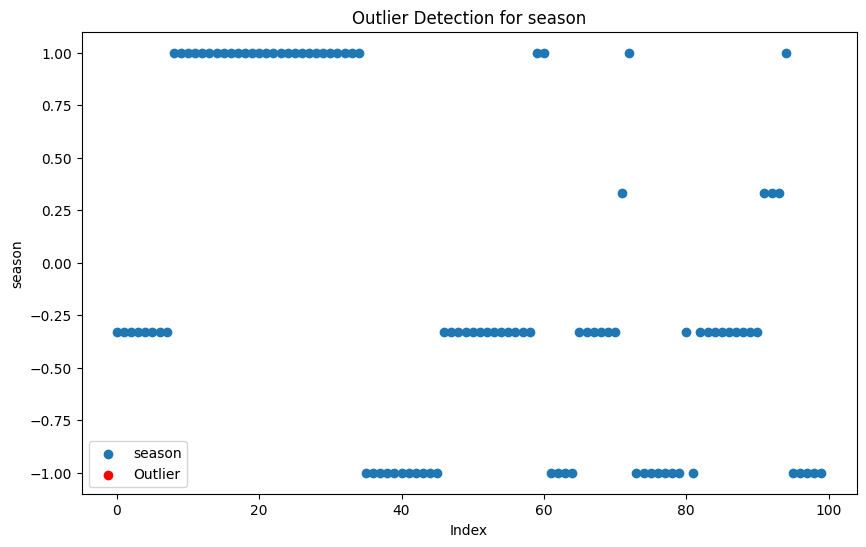

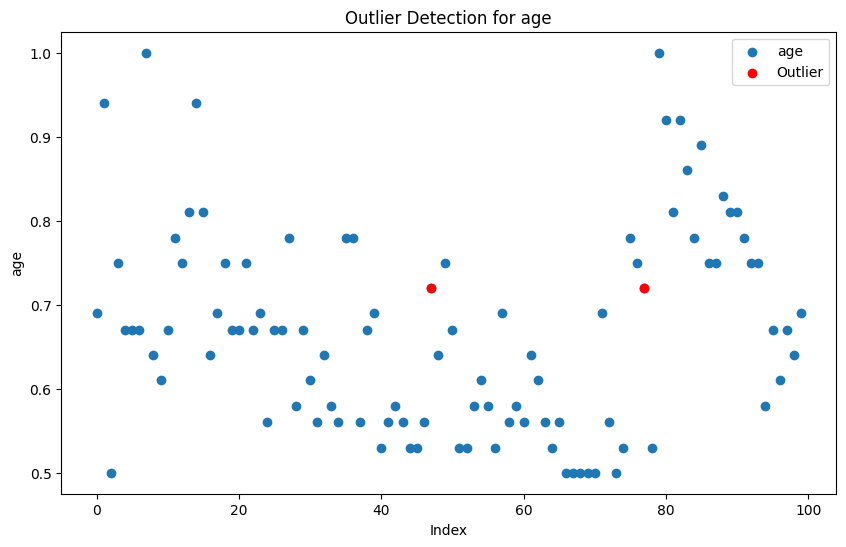

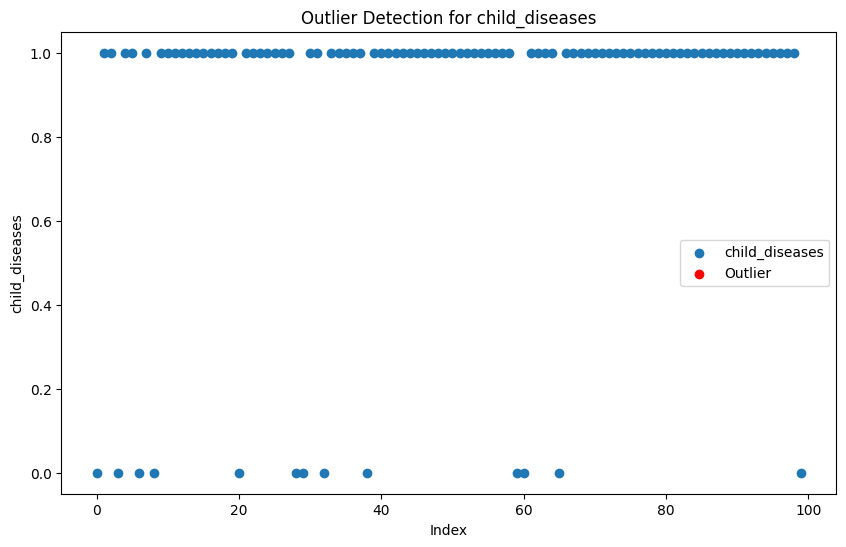

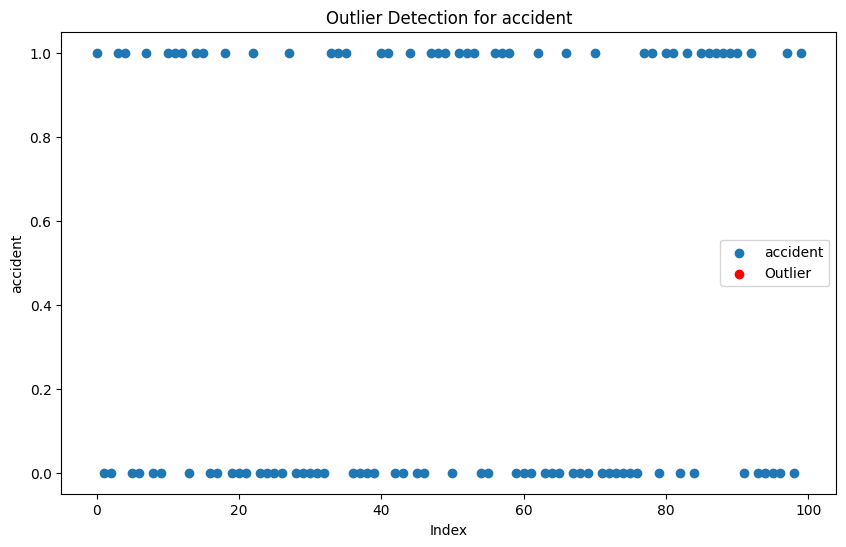

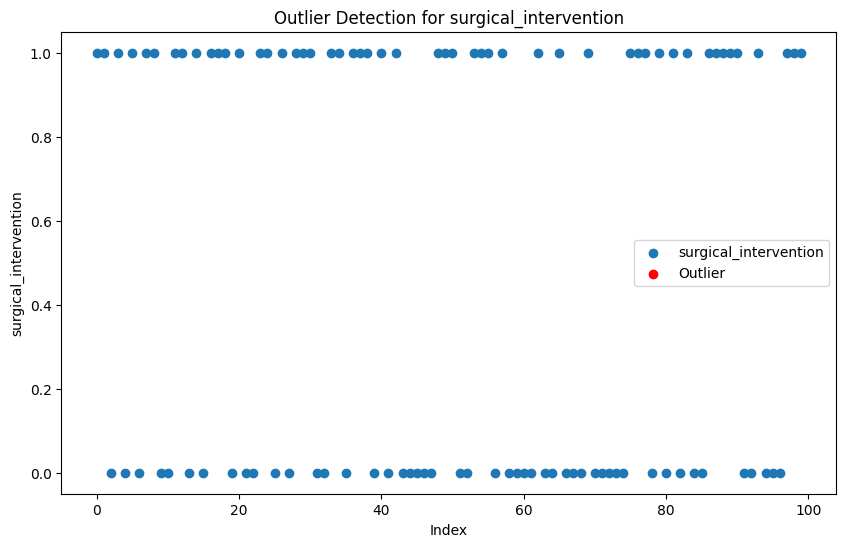

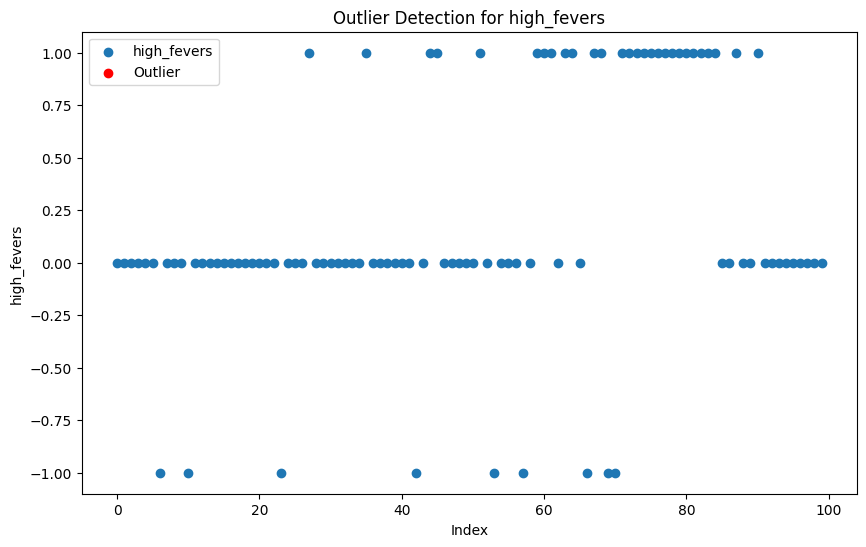

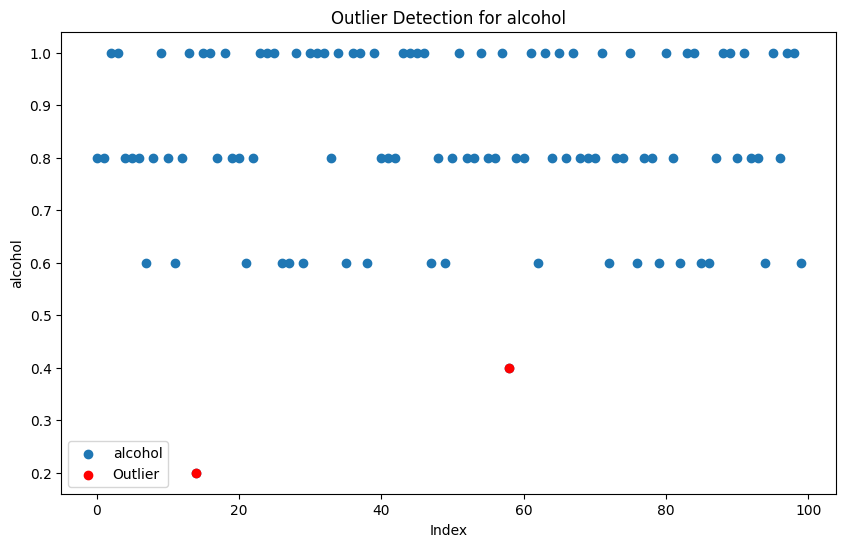

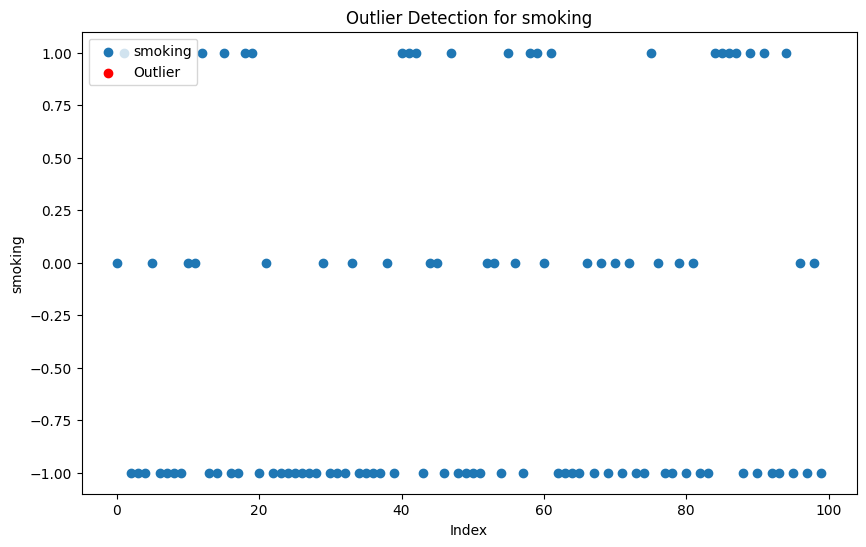

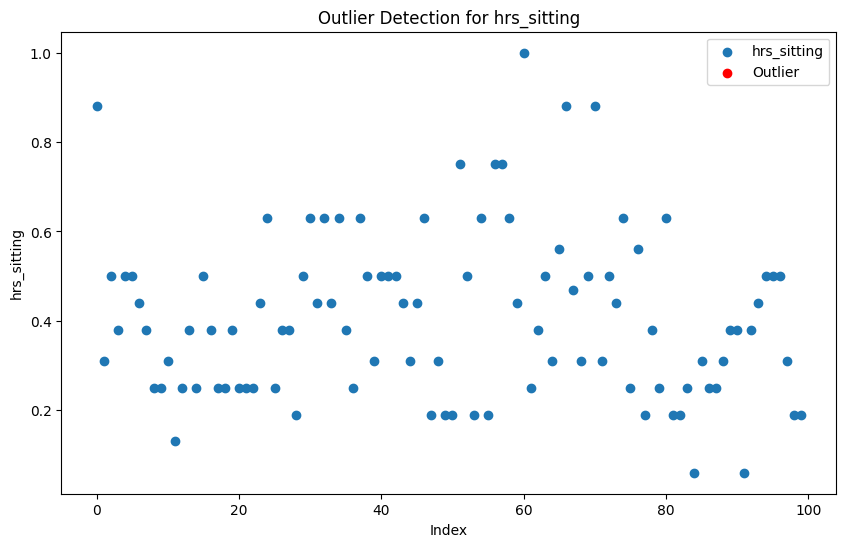

In [5]:
# Visualisasi outlier untuk setiap fitur numerik
for column in numeric_cols:
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(data_imputed_df[column])), data_imputed_df[column], label=column)
    outlier_indices_for_column = [i[0] for i in outlier_indices if i[1] == column]
    plt.scatter(outlier_indices_for_column, data_imputed_df[column].iloc[outlier_indices_for_column], color='r', label="Outlier")
    plt.xlabel("Index")
    plt.ylabel(column)
    plt.title(f"Outlier Detection for {column}")
    plt.legend()
    plt.show()

### MENGGANTI DATA OUTLIER

In [6]:
for column in numeric_cols:
    # Mengganti nilai outlier dengan mean
    mean_value = data_imputed_df[column].mean()
    data_imputed_df.loc[y_pred == -1, column] = mean_value

# Menampilkan data setelah mengganti outlier dengan mean
data = data_imputed_df
print("Data setelah mengganti outlier dengan mean:")
print(data)

Data setelah mengganti outlier dengan mean:
    season   age  child_diseases  accident  surgical_intervention  \
0    -0.33  0.69             0.0       1.0                    1.0   
1    -0.33  0.94             1.0       0.0                    1.0   
2    -0.33  0.50             1.0       0.0                    0.0   
3    -0.33  0.75             0.0       1.0                    1.0   
4    -0.33  0.67             1.0       1.0                    0.0   
..     ...   ...             ...       ...                    ...   
95   -1.00  0.67             1.0       0.0                    0.0   
96   -1.00  0.61             1.0       0.0                    0.0   
97   -1.00  0.67             1.0       1.0                    1.0   
98   -1.00  0.64             1.0       0.0                    1.0   
99   -1.00  0.69             0.0       1.0                    1.0   

    high_fevers  alcohol  smoking  hrs_sitting diagnosis  
0           0.0      0.8      0.0         0.88         N  
1        

# DATA MODELLING

Modeling dalam machine learning adalah proses menciptakan dan melatih algoritma yang dapat mengenali pola dalam data dan membuat prediksi atau keputusan berdasarkan pola tersebut. Proses ini melibatkan penggunaan teknik statistik dan komputasi untuk mengembangkan model yang dapat secara akurat merepresentasikan hubungan dalam data dan memprediksi hasil baru yang belum pernah dilihat sebelumnya. karena didalam kasus Datasets Fertility ini tujuannya adalah untuk melakukan diagnosis fertilitas jadi tentunya kita menggunakan Metode Klasifikasi.

Metode klasifikasi adalah teknik analisis data yang digunakan untuk memisahkan atau mengelompokkan data ke dalam kategori atau kelas berdasarkan atribut-atribut yang ada. Tujuan utama dari metode ini adalah membangun model yang dapat memprediksi kelas atau label data yang belum pernah dilihat sebelumnya berdasarkan fitur-fitur yang diamati. Dalam hal ini, kita menggunakan metode klasifikasi Naive Bayes karena sangat cocok untuk klasifikasi teks dan memiliki kinerja yang baik pada dataset dengan dimensi tinggi. Mari kita langsung implementasikan metode ini.

## GAUSSIAN NAIVE BAYES

Gaussian Naive Bayes adalah teknik klasifikasi dalam machine learning yang menggunakan probabilitas dan Distribusi Gaussian atau Normal. Distribusi Gaussian menganggap bahwa setiap fitur pada data independen satu sama lain dalam memprediksi target. Prediksi dari seluruh parameter digabungkan untuk menghasilkan prediksi akhir dengan probabilitas target yang diklasifikasikan ke dalam dua kelas. Hasil klasifikasi akhir adalah kelas data berdasarkan probabilitas tertinggi dari grup target.

Berikut adalah Code Naive Bayes Gaussian dari Dataset Fertility sebelum masuk ke codenya dibawah ini ada rumus Naive Bayes Gaussian:

Pada klasifikasi naive bayes gaussian kita memerlukan data train dan data test. Data train merupakan bagian dalam kumpulan dataset yang disediakan untuk menjadi bahan pembelajaran model agar model dapat menggeneralisasi (menemukan pola) data sehingga nantinya dapat digunakan untuk memprediksi data baru. Sedangkan data test adalah bagian dari kumpulan data set yang akan digunakan untuk mengetest dengan acuan prediksi dari data train yang digunakan. Untuk pembagian data nya sendiri adalah 20% menjadi data Test dan 80% menjadi data Train. Pada kode berikut random state dimulai dari 20.

In [7]:
from sklearn.model_selection import train_test_split

# Memisahkan atribut dan label
X = data[['season', 'age', 'child_diseases', 'accident', 'surgical_intervention', 'high_fevers', 'alcohol', 'smoking', 'hrs_sitting']]
y = data['diagnosis']

# Membagi dataset menjadi data latih & data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Menampilkan x_train Data

In [8]:
X_train

,season,age,child_diseases,accident,surgical_intervention,high_fevers,alcohol,smoking,hrs_sitting
55,-0.33,0.58,1.0,0.0,1.0,0.0,0.8,1.0,0.19
88,-0.33,0.83,1.0,1.0,1.0,0.0,1.0,-1.0,0.31
26,1.00,0.67,1.0,0.0,1.0,0.0,0.6,-1.0,0.38
42,-1.00,0.58,1.0,0.0,1.0,-1.0,0.8,1.0,0.50
69,-0.33,0.50,1.0,0.0,1.0,-1.0,0.8,-1.0,0.50
...,...,...,...,...,...,...,...,...,...
60,1.00,0.56,0.0,0.0,0.0,1.0,0.8,0.0,1.00
71,0.33,0.69,1.0,0.0,0.0,1.0,1.0,-1.0,0.31
14,1.00,0.94,1.0,1.0,1.0,0.0,0.2,-1.0,0.25
92,0.33,0.75,1.0,1.0,0.0,0.0,0.8,-1.0,0.38


Menampilkan x_test Data

In [9]:
X_test

,season,age,child_diseases,accident,surgical_intervention,high_fevers,alcohol,smoking,hrs_sitting
83,-0.33,0.86,1.0,1.0,1.0,1.0,1.0,-1.0,0.25
53,-0.33,0.58,1.0,1.0,1.0,-1.0,0.8,0.0,0.19
70,-0.33,0.50,1.0,1.0,0.0,-1.0,0.8,0.0,0.88
45,-1.00,0.53,1.0,0.0,0.0,1.0,1.0,0.0,0.44
44,-1.00,0.53,1.0,1.0,0.0,1.0,1.0,0.0,0.31
39,-1.00,0.69,1.0,0.0,0.0,0.0,1.0,-1.0,0.31
22,1.00,0.67,1.0,1.0,0.0,0.0,0.8,-1.0,0.25
80,-0.33,0.92,1.0,1.0,0.0,1.0,1.0,-1.0,0.63
10,1.00,0.67,1.0,1.0,0.0,-1.0,0.8,0.0,0.31
0,-0.33,0.69,0.0,1.0,1.0,0.0,0.8,0.0,0.88


Menampilkan y_train Data

In [10]:
y_train

55    N
88    N
26    O
42    N
69    N
     ..
60    N
71    N
14    N
92    N
51    N
Name: diagnosis, Length: 80, dtype: object

Menampilkan y_test Data

In [11]:
y_test

83    N
53    N
70    O
45    N
44    N
39    N
22    N
80    N
10    N
0     N
18    N
30    N
73    N
33    N
90    N
4     O
76    N
77    N
12    N
31    N
Name: diagnosis, dtype: object

In [12]:
df_train = pd.concat([X_train, y_train], axis=1, join='inner')
df_test = pd.concat([X_test, y_test], axis=1, join='inner')

In [13]:
df_train

,season,age,child_diseases,accident,surgical_intervention,high_fevers,alcohol,smoking,hrs_sitting,diagnosis
55,-0.33,0.58,1.0,0.0,1.0,0.0,0.8,1.0,0.19,N
88,-0.33,0.83,1.0,1.0,1.0,0.0,1.0,-1.0,0.31,N
26,1.00,0.67,1.0,0.0,1.0,0.0,0.6,-1.0,0.38,O
42,-1.00,0.58,1.0,0.0,1.0,-1.0,0.8,1.0,0.50,N
69,-0.33,0.50,1.0,0.0,1.0,-1.0,0.8,-1.0,0.50,N
...,...,...,...,...,...,...,...,...,...,...
60,1.00,0.56,0.0,0.0,0.0,1.0,0.8,0.0,1.00,N
71,0.33,0.69,1.0,0.0,0.0,1.0,1.0,-1.0,0.31,N
14,1.00,0.94,1.0,1.0,1.0,0.0,0.2,-1.0,0.25,N
92,0.33,0.75,1.0,1.0,0.0,0.0,0.8,-1.0,0.38,N


In [14]:
df_test

,season,age,child_diseases,accident,surgical_intervention,high_fevers,alcohol,smoking,hrs_sitting,diagnosis
83,-0.33,0.86,1.0,1.0,1.0,1.0,1.0,-1.0,0.25,N
53,-0.33,0.58,1.0,1.0,1.0,-1.0,0.8,0.0,0.19,N
70,-0.33,0.50,1.0,1.0,0.0,-1.0,0.8,0.0,0.88,O
45,-1.00,0.53,1.0,0.0,0.0,1.0,1.0,0.0,0.44,N
44,-1.00,0.53,1.0,1.0,0.0,1.0,1.0,0.0,0.31,N
39,-1.00,0.69,1.0,0.0,0.0,0.0,1.0,-1.0,0.31,N
22,1.00,0.67,1.0,1.0,0.0,0.0,0.8,-1.0,0.25,N
80,-0.33,0.92,1.0,1.0,0.0,1.0,1.0,-1.0,0.63,N
10,1.00,0.67,1.0,1.0,0.0,-1.0,0.8,0.0,0.31,N
0,-0.33,0.69,0.0,1.0,1.0,0.0,0.8,0.0,0.88,N


Berikut langkah-langkah perhitungannya:

1. Ambil data pelatihan dari model yang telah dibuat.


2. Hitung probabilitas untuk setiap data pelatihan.

3. Hitung rata-rata dan standar deviasi untuk setiap fitur dalam setiap kelas pada data pelatihan. 

4. Setelah itu, tentukan input data yang terdiri dari season, age, child_diseases, accident, surgical_intervention, high_fevers, alcohol, smoking dan hrs_sitting

5. Hitung distribusi Gaussian untuk setiap fitur dalam setiap Target pada data pelatihan.

<img src="_images/image-20240622-121623.png" width="" align="" />

6. Hitung probabilitas posterior untuk setiap Target.

<img src="_images/image-20240622-121646.png" width="" align="" />

7. Tentukan maximum posteriori

<img src="_images/image-20240622-121712.png" width="" align="" />


8. Pada Target yg mendapat posteriori maksimal itulah Target dari data inputan baru tersebut

Berikut adalah code gaussian naive bayes dengan menggunakan sklearn:

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Membuat model Gaussian naive bayes
gnb_model = GaussianNB()

# Melatih model dengan menggunakan data latih
gnb_model = gnb_model.fit(X_train, y_train)

# Evaluasi Model
y_pred = gnb_model.predict(X_test)

accuracy = gnb_model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9


Disini kita mendapatkan akurasi sebesar 0,9

Setelah itu maka kita langsung akan memprediksi suatu data baru ke dalam model yang telah kita buat, untuk data yang akan kita inputkan adalah sebagai berikut :

season: 1, age: 0.94, child_diseases: 1, accindent: 0, surgical_intervention: 1, high_fevers: 0, alcohol: 0.8, smoking: 1, hrs_sitting:0.3

In [16]:
print(gnb_model.predict([[1, 0.94, 1, 0, 1, 0, 0.8, 1, 0.3]]))

['O']
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Dari hasil tersebut data yang kita inputkan didiagnosisi O (Altered).

# ESEMBLE LEARNING

Ensemble learning adalah teknik dalam machine learning yang menggabungkan prediksi dari beberapa model untuk meningkatkan performa dan akurasi prediksi dibandingkan dengan menggunakan satu model saja. Ide dasarnya adalah dengan mengkombinasikan beberapa model yang berbeda, kita dapat mengurangi risiko kesalahan yang mungkin terjadi jika hanya mengandalkan satu model.

## STACKING CLASSIFIER

<img src="_images/image-20240623-143540.png" width="50%" align="" />

Stacking classifier adalah metode ensemble learning yang menggabungkan beberapa model (disebut sebagai base models atau level-0 models) dengan menggunakan model lain (disebut sebagai meta-learner atau level-1 model) untuk membuat prediksi akhir. Prosesnya adalah sebagai berikut:

- Melatih beberapa base models pada data pelatihan.

- Membuat prediksi dari setiap base model pada data validasi dan data pelatihan.

- Menggunakan prediksi dari base models sebagai fitur baru untuk melatih meta-learner.

- Meta-learner membuat prediksi akhir berdasarkan fitur-fitur baru ini.

Keunggulan stacking adalah kemampuan untuk menggabungkan kekuatan dari berbagai model yang berbeda untuk menghasilkan prediksi yang lebih akurat.

### KNN 3

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
clf_n_3 = KNeighborsClassifier(n_neighbors=2)

clf_n_3.fit(X_train, y_train)

# joblib.dump(clf_n_3, 'stacking/knn_3.joblib')

result = clf_n_3.predict(X_train)

result_n_3 = pd.DataFrame(result, columns=['P1'])

result_n_3

,P1
0,N
1,N
2,O
3,N
4,N
...,...
75,N
76,N
77,N
78,N


### KNN 5

In [19]:
clf_n_5 = KNeighborsClassifier(n_neighbors=5)

clf_n_5.fit(X_train, y_train)

# joblib.dump(clf_n_5, 'stacking/knn_5.joblib')

result = clf_n_5.predict(X_train)

result_n_5 = pd.DataFrame(result, columns=['P2'])

result_n_5

,P2
0,N
1,N
2,O
3,N
4,N
...,...
75,N
76,N
77,N
78,N


### KNN 7

In [20]:
clf_n_7 = KNeighborsClassifier(n_neighbors=7)

clf_n_7.fit(X_train, y_train)

# joblib.dump(clf_n_7, 'stacking/knn_7.joblib')

result = clf_n_7.predict(X_train)

result_n_7 = pd.DataFrame(result, columns=['P3'])

result_n_7

,P3
0,N
1,N
2,N
3,N
4,N
...,...
75,N
76,N
77,N
78,N


Menggabungkan semua hasil KNN menjadi 1 tabel

In [21]:
x_combined = pd.concat([result_n_3, result_n_5, result_n_7], axis=1)

x_combined

,P1,P2,P3
0,N,N,N
1,N,N,N
2,O,O,N
3,N,N,N
4,N,N,N
...,...,...,...
75,N,N,N
76,N,N,N
77,N,N,N
78,N,N,N


### MENGGABUNGKAN DAN MERUBAH DATA KE NUMERIC

In [22]:
X = pd.get_dummies(x_combined,prefix=["P1","P2", "P3"],columns=["P1","P2", "P3"], dtype='int')

X

,P1_N,P1_O,P2_N,P2_O,P3_N,P3_O
0,1,0,1,0,1,0
1,1,0,1,0,1,0
2,0,1,0,1,1,0
3,1,0,1,0,1,0
4,1,0,1,0,1,0
...,...,...,...,...,...,...
75,1,0,1,0,1,0
76,1,0,1,0,1,0
77,1,0,1,0,1,0
78,1,0,1,0,1,0


### MODELLING GAUSSIAN NAIVES BAYES SEBAGAI META CLASSIFIER

In [23]:
clf_nb = GaussianNB()

clf_nb.fit(X, y_train)

# joblib.dump(clf_nb, 'stacking/meta_clf.joblib')

clf_nb.score(X, y_train)

0.9

### MELAKUKAN PREDIKSI

In [24]:
def stackingClassifier(data):
  result_n_3 = pd.DataFrame(clf_n_3.predict(data), columns=['P1'])
  result_n_5 = pd.DataFrame(clf_n_5.predict(data), columns=['P2'])
  result_n_7 = pd.DataFrame(clf_n_7.predict(data), columns=['P3'])
  data = pd.concat([result_n_3, result_n_5, result_n_7], axis=1)
  x_predict = pd.get_dummies(data,prefix=["P1","P2", "P3"],columns=["P1","P2", "P3"], dtype='int')
  if 'P1_N' not in x_predict.columns and 'P2_N' not in x_predict.columns and 'P3_N' not in x_predict.columns:
    x_predict.insert(0, "P1_N", [0], True)
    x_predict.insert(2, "P2_N", [0], True)
    x_predict.insert(4, "P3_N", [0], True)
  elif 'P1_O' not in x_predict.columns and 'P2_O' not in x_predict.columns and 'P3_O' not in x_predict.columns:
    x_predict.insert(1, "P1_O", [0], True)
    x_predict.insert(3, "P2_O", [0], True)
    x_predict.insert(5, "P3_O", [0], True)
  return clf_nb.predict(x_predict), clf_nb.score(X, y_train)

In [25]:
data = [[1, 0.94, 1, 0, 1, 0, 0.8, 1, 0.3]]
prediction, score = stackingClassifier(data)
print(f'prediction : {prediction}, accuration : {score}')

prediction : ['N'], accuration : 0.9
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## BAGGING CLASSIFIER

<img src="_images/image-20240623-145312.png" width="50%" align="" />

Bagging adalah salah satu metode ensemble learning yang bertujuan untuk meningkatkan akurasi dan stabilitas model prediksi. Prosesnya adalah sebagai berikut:

- Membuat beberapa subset dari data pelatihan asli dengan melakukan bootstrap sampling (sampling dengan pengembalian).

- Melatih model yang sama (misalnya, Gaussian Naive Bayes) pada masing-masing subset.

- Menggabungkan hasil prediksi dari semua model dengan cara rata-rata (untuk regresi) atau voting (untuk klasifikasi).

### MEMBUAT DATA SAMPEL BOOTSTRAP

In [26]:
B1 = df_train.sample(frac=1)

B1

,season,age,child_diseases,accident,surgical_intervention,high_fevers,alcohol,smoking,hrs_sitting,diagnosis
19,1.00,0.67,1.0,0.0,0.0,0.0,0.8,1.0,0.38,O
93,0.33,0.75,1.0,0.0,1.0,0.0,0.8,-1.0,0.44,O
32,1.00,0.64,0.0,0.0,0.0,0.0,1.0,-1.0,0.63,N
69,-0.33,0.50,1.0,0.0,1.0,-1.0,0.8,-1.0,0.50,N
87,-0.33,0.75,1.0,1.0,1.0,1.0,0.8,1.0,0.25,N
...,...,...,...,...,...,...,...,...,...,...
40,-1.00,0.53,1.0,1.0,1.0,0.0,0.8,1.0,0.50,N
8,1.00,0.64,0.0,0.0,1.0,0.0,0.8,-1.0,0.25,N
75,-1.00,0.78,1.0,0.0,1.0,1.0,1.0,1.0,0.25,N
35,-1.00,0.78,1.0,1.0,0.0,1.0,0.6,-1.0,0.38,N


In [27]:
B2 = df_train.sample(frac=1)

B2

,season,age,child_diseases,accident,surgical_intervention,high_fevers,alcohol,smoking,hrs_sitting,diagnosis
60,1.00,0.56,0.0,0.0,0.0,1.0,0.8,0.0,1.00,N
52,-0.33,0.53,1.0,1.0,0.0,0.0,0.8,0.0,0.50,N
19,1.00,0.67,1.0,0.0,0.0,0.0,0.8,1.0,0.38,O
58,-0.33,0.56,1.0,1.0,0.0,0.0,0.4,1.0,0.63,N
47,-0.33,0.72,1.0,1.0,0.0,0.0,0.6,1.0,0.19,N
...,...,...,...,...,...,...,...,...,...,...
23,1.00,0.69,1.0,0.0,1.0,-1.0,1.0,-1.0,0.44,O
99,-1.00,0.69,0.0,1.0,1.0,0.0,0.6,-1.0,0.19,N
40,-1.00,0.53,1.0,1.0,1.0,0.0,0.8,1.0,0.50,N
37,-1.00,0.56,1.0,0.0,1.0,0.0,1.0,-1.0,0.63,N


In [28]:
B3 = df_train.sample(frac=1)

B3

,season,age,child_diseases,accident,surgical_intervention,high_fevers,alcohol,smoking,hrs_sitting,diagnosis
26,1.00,0.67,1.0,0.0,1.0,0.0,0.6,-1.0,0.38,O
23,1.00,0.69,1.0,0.0,1.0,-1.0,1.0,-1.0,0.44,O
42,-1.00,0.58,1.0,0.0,1.0,-1.0,0.8,1.0,0.50,N
92,0.33,0.75,1.0,1.0,0.0,0.0,0.8,-1.0,0.38,N
15,1.00,0.81,1.0,1.0,0.0,0.0,1.0,1.0,0.50,N
...,...,...,...,...,...,...,...,...,...,...
63,-1.00,0.56,1.0,0.0,0.0,1.0,1.0,-1.0,0.50,N
91,0.33,0.78,1.0,0.0,0.0,0.0,1.0,1.0,0.06,N
29,1.00,0.67,0.0,0.0,1.0,0.0,0.6,0.0,0.50,O
1,-0.33,0.94,1.0,0.0,1.0,0.0,0.8,1.0,0.31,O


### MODELLING MENGGUNAKAN GAUSSIAN NAIVE BAYES

Membuat tiga model Naives Bayes sebagai estimator untuk digunakan dalam BaggingClassifiers

In [29]:
B1_x = B1.drop(['diagnosis'], axis=1)
B1_y = B1['diagnosis']

M1 = GaussianNB()
M1.fit(B1_x, B1_y)

# # saving model with joblib
# joblib.dump(M1, 'bagging/m1.joblib')

M1_predict = M1.predict(X_train)

M1_result = pd.DataFrame(M1_predict, columns=['P1'])

# M1.score(x_test, y_test)

In [30]:
B2_x = B2.drop(['diagnosis'], axis=1)
B2_y = B2['diagnosis']

M2 = GaussianNB()
M2.fit(B2_x, B2_y)

# # saving model with joblib
# joblib.dump(M2, 'bagging/m2.joblib')

M2_predict = M2.predict(X_train)

M2_result = pd.DataFrame(M2_predict, columns=['P2'])

# M2.score(x_test, y_test)

In [31]:
B3_x = B3.drop(['diagnosis'], axis=1)
B3_y = B3['diagnosis']

M3 = GaussianNB()
M3.fit(B3_x, B3_y)

# # saving model with joblib
# joblib.dump(M3, 'bagging/m3.joblib')

M3_predict = M3.predict(X_train)

M3_result = pd.DataFrame(M3_predict, columns=['P3'])

# M3.score(x_test, y_test)

### MENGGABUNGKAN DAN MERUBAH DATA KE NUMERIC

In [32]:
x_combined = pd.concat([M1_result, M2_result, M3_result], axis=1)

X = pd.get_dummies(x_combined,prefix=["P1","P2", "P3"],columns=["P1","P2", "P3"], dtype='int')

X

,P1_N,P1_O,P2_N,P2_O,P3_N,P3_O
0,1,0,1,0,1,0
1,1,0,1,0,1,0
2,0,1,0,1,0,1
3,1,0,1,0,1,0
4,1,0,1,0,1,0
...,...,...,...,...,...,...
75,1,0,1,0,1,0
76,1,0,1,0,1,0
77,1,0,1,0,1,0
78,1,0,1,0,1,0


### MEMBUAT AGREGASI

In [33]:
clf_knn = KNeighborsClassifier(n_neighbors=3)

clf_knn.fit(X, y_train)

# saving model with joblib
# joblib.dump(clf_knn, 'bagging/aggregation.joblib')

clf_knn.score(X, y_train)

0.9125

### MELAKUKAN PREDIKSI

In [34]:
def baggingClassifier(data):
  B1 = df_train.sample(frac=1)
  B2 = df_train.sample(frac=1)
  B3 = df_train.sample(frac=1)

  B1_x = B1.drop(['diagnosis'], axis=1)
  B1_y = B1['diagnosis']

  M1.fit(B1_x, B1_y)
  M1_predict = M1.predict(data)
  M1_result = pd.DataFrame(M1_predict, columns=['P1'])

  B2_x = B2.drop(['diagnosis'], axis=1)
  B2_y = B2['diagnosis']

  M2.fit(B2_x, B2_y)
  M2_predict = M2.predict(data)
  M2_result = pd.DataFrame(M2_predict, columns=['P2'])

  B3_x = B3.drop(['diagnosis'], axis=1)
  B3_y = B3['diagnosis']

  M3.fit(B3_x, B3_y)
  M3_predict = M3.predict(data)
  M3_result = pd.DataFrame(M3_predict, columns=['P3'])

  x_combined = pd.concat([M1_result, M2_result, M3_result], axis=1)
  x_predict = pd.get_dummies(x_combined,prefix=["P1","P2", "P3"],columns=["P1","P2", "P3"], dtype='int')

  if 'P1_N' not in x_predict.columns and 'P2_N' not in x_predict.columns and 'P3_N' not in x_predict.columns:
    x_predict.insert(0, "P1_N", [0], True)
    x_predict.insert(2, "P2_N", [0], True)
    x_predict.insert(4, "P3_N", [0], True)
  elif 'P1_O' not in x_predict.columns and 'P2_O' not in x_predict.columns and 'P3_O' not in x_predict.columns:
    x_predict.insert(1, "P1_O", [0], True)
    x_predict.insert(3, "P2_O", [0], True)
    x_predict.insert(4, "P3_O", [0], True)

  clf_knn.fit(X, y_train)
  return clf_knn.predict(x_predict), clf_knn.score(X, y_train)

In [35]:
data = [[1, 0.94, 1, 0, 1, 0, 0.8, 1, 0.3]]
prediction, score = baggingClassifier(data)
print(f'prediction : {prediction}, accuration : {score}')

prediction : ['O'], accuration : 0.9125
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


# KESIMPULAN

Kami mendapatkan kesimpulan bahwa hasil yang terbaik adalah dengan menggunakan model dari Bagging Classifier. Hasil akurasi Bagging lebih tinggi daripada akurasi Stacking, yaitu akurasi Bagging 0.9125 sedangkan akurasi Stacking 0.9

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=eaaefd1d-a519-4230-92dc-10a6a9c0aa5e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>